In [2]:
import cv2
import numpy as np 
import pandas as pd 
import os

In [9]:
video = cv2.VideoCapture('Sample.mp4')
if not video.isOpened():
    print("Error: Unstable to open video file.")
    exit()
success, image = video.read()
count = 0
output_dir = "D:\\DayNight_vision\\images\\"
while True:
    success, image = video.read()
    if success:
        cv2.imwrite(f"{output_dir}{count}.png", image)
        count+=1
    else:
        break
    
video.release()
print(f"Saved {count} frames to {output_dir}")

Saved 4815 frames to D:\DayNight_vision\images\


In [ ]:
frames_path = "D:\\DayNight_vision\\images\\"
frame_files = sorted([f for f in os.listdir(frames_path) if f.endswith('.png')], key = lambda x: int(x.split('.')[0]))
brightness_values=[]
for frame_file in frame_files:
    frame_path = os.path.join(frames_path, frame_file)
    frame = cv2.imread(frame_path)
    
    if frame is None:
        print(f"Warning: Could not read from {frame_file}")
    
    # Converting to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculating average brightness
    brightness = np.mean(gray_frame)
    brightness_values.append(brightness)
    

# Printing summary
print(f"Processed {len(brightness_values)} frames.")
print(f"First 10 brightness values: {brightness_values[:10]}")

#Save brightness values to a file 
with open("brightness_values.txt","w") as f:
    for i, value in enumerate(brightness_values):
        f.write(f"Frame {i}: {value}\n")

In [7]:
print(brightness_values[0:10])

[]


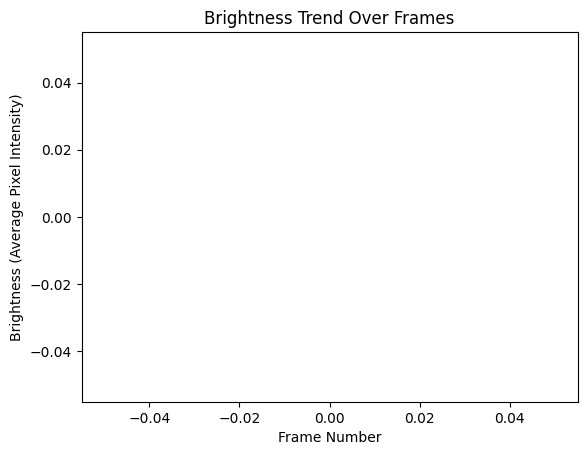

In [8]:
import matplotlib.pyplot as plt

plt.plot(brightness_values)
plt.title("Brightness Trend Over Frames")
plt.xlabel("Frame Number")
plt.ylabel("Brightness (Average Pixel Intensity)")
plt.show()


In [12]:
max_brightness = max(brightness_values)
min_brightness = min(brightness_values)
brightest_frame = brightness_values.index(max_brightness)
darkest_frame = brightness_values.index(min_brightness)
print(f"Brightest Frame: {brightest_frame} with brightness {max_brightness}")
print(f"Darkest Frame: {darkest_frame} with brightness {min_brightness}")


Brightest Frame: 4787 with brightness 103.9602177473262
Darkest Frame: 650 with brightness 2.723443181818182


In [13]:
# Define brightness ranges (you can customize these)
brightness_ranges = {
    "Very Dark": (0, 20),
    "Dark": (20, 40),
    "Neutral": (40, 60),
    "Bright": (60,80),
    "Very Bright": (80, 100),
}

# Dictionary to store grouped frame indices
grouped_frames = {key: [] for key in brightness_ranges}

# Categorize each frame based on its brightness value
for i, brightness in enumerate(brightness_values):
    for group, (low, high) in brightness_ranges.items():
        if low <= brightness <= high:
            grouped_frames[group].append(i)  # Store frame index
            break

# Print grouped results
for group, frames in grouped_frames.items():
    print(f"{group} ({len(frames)} frames): {frames[:10]} ...")  # Display first 10 frames for each group


Very Dark (2383 frames): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ...
Dark (65 frames): [2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392] ...
Neutral (65 frames): [2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457] ...
Bright (683 frames): [2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522] ...
Very Bright (1556 frames): [2564, 2565, 2566, 2567, 2568, 2569, 2570, 2572, 2574, 2585] ...


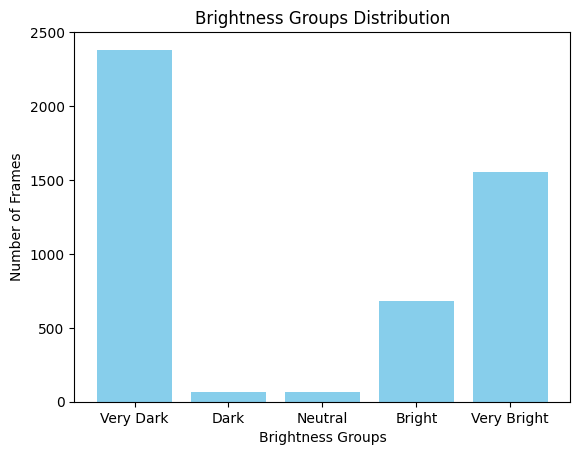

In [16]:
group_counts = [len(frames) for frames in grouped_frames.values()]
group_labels = list(grouped_frames.keys())

plt.bar(group_labels, group_counts, color='skyblue')
plt.title("Brightness Groups Distribution")
plt.xlabel("Brightness Groups")
plt.ylabel("Number of Frames")
plt.show()


In [22]:
group_counting = [len(frames) for frames in grouped_frames.values()]
print(group_counting)


[2383, 65, 65, 683, 1556]


In [37]:
# Brightness ranges for categorization
categories = {
    "Morning": (60, 100),
    "Sunset": (40, 60),
    "Night": (0, 40),
}

# Initialize counters
frame_counts = {key: 0 for key in categories}

# Categorize frames
total_frames = len(brightness_values)
for brightness in brightness_values:
    for category, (low, high) in categories.items():
        if low <= brightness <= high:
            frame_counts[category] += 1
            break

# Calculate percentages
percentages = {key: (count / total_frames) * 100 for key, count in frame_counts.items()}

# Display results
print(f"Total frames: {total_frames}")
for category in categories:
    print(f"{category} frames saved: {frame_counts[category]}")
print(f"Morning Percentage: {percentages['Morning']:.2f}%")
print(f"Sunset time Percentage: {percentages['Sunset']:.2f}%")
print(f"Night Percentage: {percentages['Night']:.2f}%")



Total frames: 4815
Morning frames saved: 2239
Sunset frames saved: 65
Night frames saved: 2448
Morning Percentage: 46.50%
Sunset time Percentage: 1.35%
Night Percentage: 50.84%


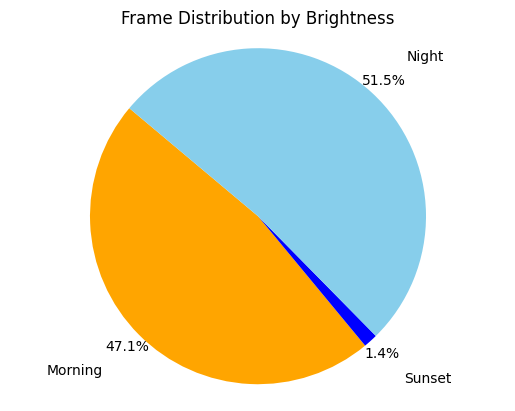

In [38]:
labels = frame_counts.keys()
sizes = frame_counts.values()
colors = ['orange', 'blue', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.3)
plt.title("Frame Distribution by Brightness")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()